In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mod_packs import quantum_potential as qp

In [18]:
price_df = pd.read_excel('PRICE INDEX.xlsx').dropna().set_index('Date')
price_val = price_df.T.values
names = [price_df.columns[i][:3] for i in range(8)]
data = np.load('fitness_p_count50steps100retain0.3rnd0.3mutate0.30.6410816430739228.npy' , allow_pickle=True)

In [12]:
low_risk_portfos = np.load('final_portfos.npy' , allow_pickle=True)

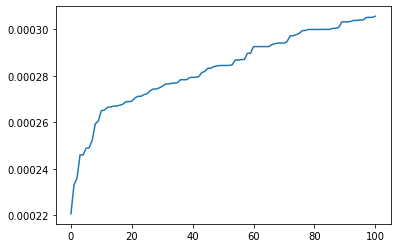

In [13]:
plt.plot(sorted(data[:,0]))

In [14]:
ma = np.where(data[:,0] == max(data[:,0]))[0][0]
data[ma]

array([0.00030562227656906666,
       list([0.015715740977449585, 0.004982276137978993, 0.04224518502829162, 0.003786005899704897, 0.8090589625441255, 0.03189021777839664, 0.01679331531345528, 0.07552829632059763])],
      dtype=object)

In [15]:
portfo = data[ma,1]
price_df = pd.read_excel('PRICE INDEX.xlsx').set_index('Date').dropna()
price_val = price_df.values.T
ret_values = [qp.scaled_return(price_val[i],1) for i in range(8)]
port_ret_max = qp.ind_generator(ret_values , portfo)

In [27]:
# plt.plot([np.mean(ret_values[i]) for i in range(8)] , 'o')
tot_df = pd.DataFrame({'mean_ret':[np.mean(ret_values[i])*100 for i in range(8)]} , index=names)
tot_df     

,mean_ret
S&P,0.026761
FTS,0.014917
DAX,0.027747
TOP,-0.000859
SHA,0.032252
KOR,0.018280
NIK,-0.000966
DOW,0.029631


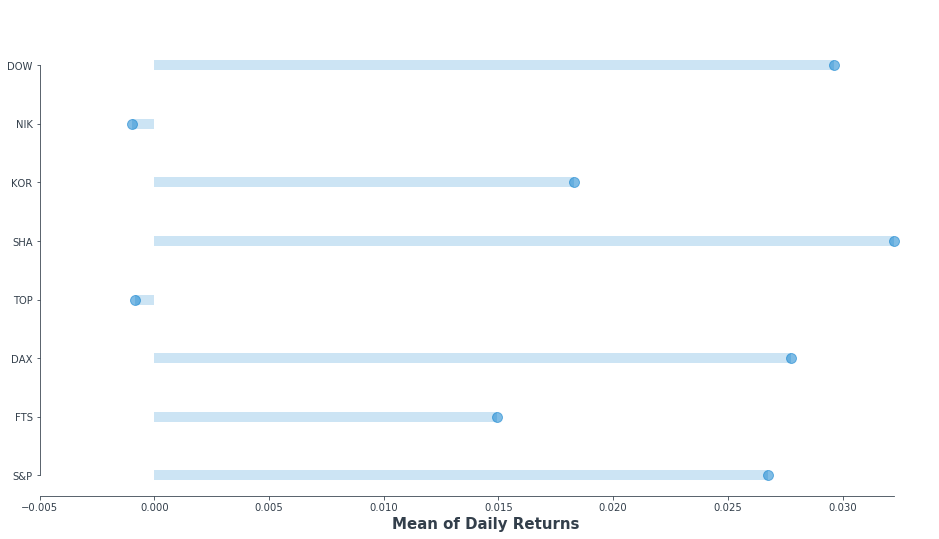

In [43]:
                           
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize=(16,9))
my_range=list(tot_df.index)  
ran1 = range(8)
ran2 = [0  , 0.9, 1.9, 2.9, 3.9, 4.9, 5.9, 6.8 , 7.77]
width = 1
plt.hlines(y=ran1, xmin=0, xmax=tot_df['mean_ret'], color='#007acc', alpha=0.2, linewidth=10)
# plt.hlines(y=ran2, xmin=0, xmax=tot_df['STD'], color='red', alpha=0.2, linewidth=5)

plt.plot(tot_df['mean_ret'], ran1, "o", markersize=10, color='#007acc', alpha=0.5 , label='Q-potential risk')
# plt.plot(tot_df['STD'], ran2, "o", markersize=5, color='red', alpha=0.6 , label='STD')

# plt.legend()
ax.set_xlabel('Mean of Daily Returns', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')
plt.yticks(np.arange(9) ,my_range)
plt.xticks(np.arange(-0.005,0.035, 0.005))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.savefig('each_market_mean_return.png', dpi=300, bbox_inches='tight')

In [60]:
np.mean([np.mean(ret_values[i]) for i in range(8)])

0.00018470192375919198

In [45]:
low_risk_portfos[0]

array([0.11309476, 0.10275511, 0.08849958, 0.14085771, 0.16814677,
       0.14441716, 0.0565606 , 0.1856683 ])

In [62]:
risks = []
for ind in range(len(data)):
    d,u = qp.risk_data_input(qp.ind_generator([qp.scaled_return(price_val[i],1) for i in range(8)] , data[ind,1]), 0.0005)
    risks.append(u-d)    
low_risks = []
low_risk_returns = []
for ind in range(len(low_risk_portfos)):
    d,u = qp.risk_data_input(qp.ind_generator([qp.scaled_return(price_val[i],1) for i in range(8)] , low_risk_portfos[ind]), 0.0005)
    low_risks.append(u-d)      
    port_ret = qp.ind_generator([qp.scaled_return(price_val[i],1) for i in range(8)] , low_risk_portfos[ind])
    low_risk_returns.append(np.mean(port_ret))
low_risk_returns.remove(low_risk_returns[1])
low_risks.remove(low_risks[1])    

In [89]:
low_risk_returns

[0.0002040363785789474,
 0.00020175147498516946,
 0.00021533601997078918,
 0.0002141808810430285,
 0.00020431742699694556,
 0.00020535486442039454,
 0.00021514191532680564,
 0.0002198397108051207]

In [128]:
best_port_ret = []
best_port_ris = []
for i in range(len(risks)):
    if risks[i]<0.125 and data[i,0]>0.000278:
        best_port_ris.append(risks[i])
        best_port_ret.append(data[i,0])
            

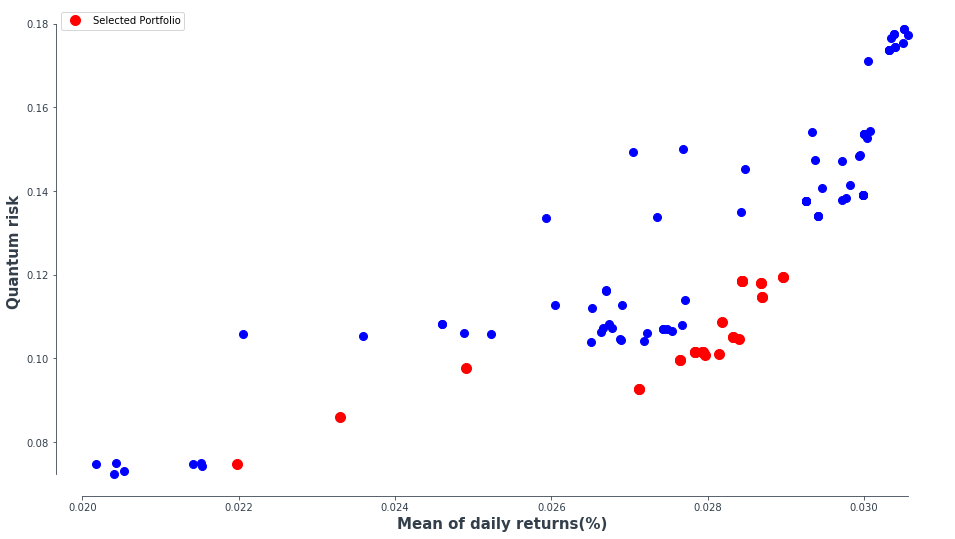

In [138]:
fig, ax = plt.subplots(figsize=(16,9))
minnn = np.array(risks)[np.array(risks)<0.1]
wher = [np.where(np.array(risks) == minnn[i])[0][0] for i in range(len(minnn))]

plt.plot(data[:,0]*100 , risks , 'o' ,color='blue', markersize=8)
plt.plot(np.array(low_risk_returns[:-1])*100 , low_risks[:-1], 'o' , color='blue' , markersize=8)

plt.plot(np.array(low_risk_returns[-1])*100 , low_risks[-1], 'o' , color='red' , markersize=10)
plt.plot(np.array(data[wher,0])*100 , np.array(risks)[wher] , 'o' , color='red' , markersize=10)
plt.plot(np.array(best_port_ret)*100 , best_port_ris , 'o' , color='red' , markersize=10 , label='Selected Portfolio')

# plt.hlines(y=[0.08], xmin=0.0002, xmax=0.00031, color='lawngreen', alpha=1, linewidth=150)
# plt.hlines(y=[0.10], xmin=0.0002, xmax=0.00031, color='cyan', alpha=1, linewidth=100)
# plt.hlines(y=[0.15], xmin=0.0002, xmax=0.00031, color='red', alpha=0.8, linewidth=250)

plt.xlabel('Mean of daily returns(%)' , fontsize=15, fontweight='black', color = '#333F4B')
plt.ylabel('Quantum risk' , fontsize=15, fontweight='black', color = '#333F4B')

# plt.xticks([0,1,2,3,4,5,6,7],[2,3,4,5,6,7,8] )
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
plt.legend()
plt.savefig('test_risk_vs_return2.png', dpi=300, bbox_inches='tight' , transparent=False)

In [110]:
np.where(np.array(risks) == np.array(risks)[np.array(risks)<0.093])

<ipython-input-110-3922030f8cc6>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.where(np.array(risks) == np.array(risks)[np.array(risks)<0.093])


(array([], dtype=int64),)

In [116]:
minnn = np.array(risks)[np.array(risks)<0.10]
wher = [np.where(np.array(risks) == minnn[i])[0][0] for i in range(len(minnn))]

In [118]:
np.array(risks)[wher]

array([0.08598981, 0.09780434, 0.09280156, 0.09280156, 0.09961643,
       0.09961643])

In [121]:
data[wher,0]

array([0.0002329723141844959, 0.00024902370079713556,
       0.00027117958815346395, 0.00027117958815346395,
       0.00027648320454454266, 0.00027648320454454266], dtype=object)